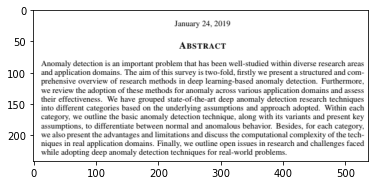

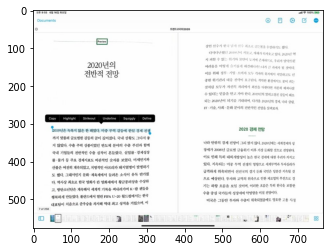

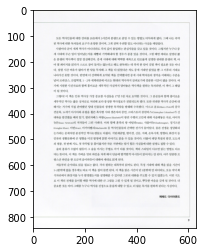

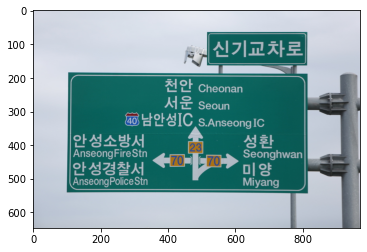

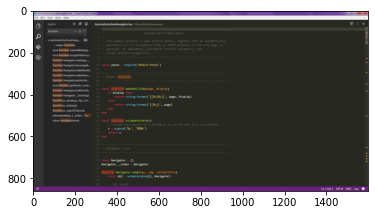

In [1]:
import cv2
import matplotlib.pyplot as plt
import os

path0 = os.getenv('HOME')+'/aiffel/ocr_python/0.jpg'
path1 = os.getenv('HOME')+'/aiffel/ocr_python/1.jpg'
path2 = os.getenv('HOME')+'/aiffel/ocr_python/2.jpg'
path3 = os.getenv('HOME')+'/aiffel/ocr_python/3.jpg'
path4 = os.getenv('HOME')+'/aiffel/ocr_python/4.jpg'

img0 = cv2.imread(path0, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img0, cv2.COLOR_BGR2RGB))
plt.show()
img1 = cv2.imread(path1, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()
img2 = cv2.imread(path2, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()
img3 = cv2.imread(path3, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()
img4 = cv2.imread(path4, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.show()


paths = []

for i in range(5):
    paths.append(os.getenv('HOME')+'/aiffel/ocr_python/'+str(i)+'.jpg')
    

# OCR(Optical Character Recognition, 광학 문자 인식)

- API 사용 테스트

In [2]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [3]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

for i in range(4):
    detect_text(paths[i])

-rw-r--r-- 1 aiffel-dj45 aiffel-dj45 2359  3월 16 10:21 /home/aiffel-dj45/aiffel/ocr_python/my_google_api_key.json
Texts:

"January 24, 2019
ABSTRACT
Anomaly detection is an important problem that has been well-studied within diverse research areas
and application domains. The aim of this survey is two-fold, firstly we present a structured and com-
prehensive overview of research methods in deep learning-based anomaly detection. Furthermore,
we review the adoption of these methods for anomaly across various application domains and assess
their effectiveness. We have grouped state-of-the-art deep anomaly detection research techniques
into different categories based on the underlying assumptions and approach adopted. Within each
category, we outline the basic anomaly detection technique, along with its variants and present key
assumptions, to differentiate between normal and anomalous behavior. Besides, for each category,
we also present the advantages and limitations and discuss the comp

Texts:

"신기교차로
천안 Cheonan
서운 seoun
40 H2SIC s.Anseong IC
안성소방서
Anseong Fire Stn
안성경찰서
AnseongPolice Stn
성환
Seonghwan
미양
Miyang
23
70-70
"

"신기"

"교차로"

"천안"

"Cheonan"

"서운"

"seoun"

"40"

"H2SIC"

"s.Anseong"

"IC"

"안성"

"소방서"

"Anseong"

"Fire"

"Stn"

"안성"

"경찰서"

"AnseongPolice"

"Stn"

"성환"

"Seonghwan"

"미양"

"Miyang"

"23"

"70-70"
bounds: (355,423),(562,426),(561,472),(354,469)


- 갓 글! 닥 google vision!! 한글도 인식 잘한다~

In [4]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel-dj45/.keras-ocr/craft_mlt_25k.h5
Looking for /home/aiffel-dj45/.keras-ocr/crnn_kurapan.h5


In [22]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://images.unsplash.com/photo-1552959988-b94b76838365?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=1950&q=80',
  'https://images.unsplash.com/photo-1603484703346-361154238e8a?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=1351&q=80',
  'https://images.unsplash.com/photo-1583220819993-47cf6e7a5402?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=2134&q=80',
  'https://images.unsplash.com/photo-1599746791327-d21c15349a33?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=675&q=80',
  'http://img.hani.co.kr/imgdb/resize/2016/0721/00500868_20160721.JPG'  
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

In [23]:
len(images)

5

/home/aiffel-dj45/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


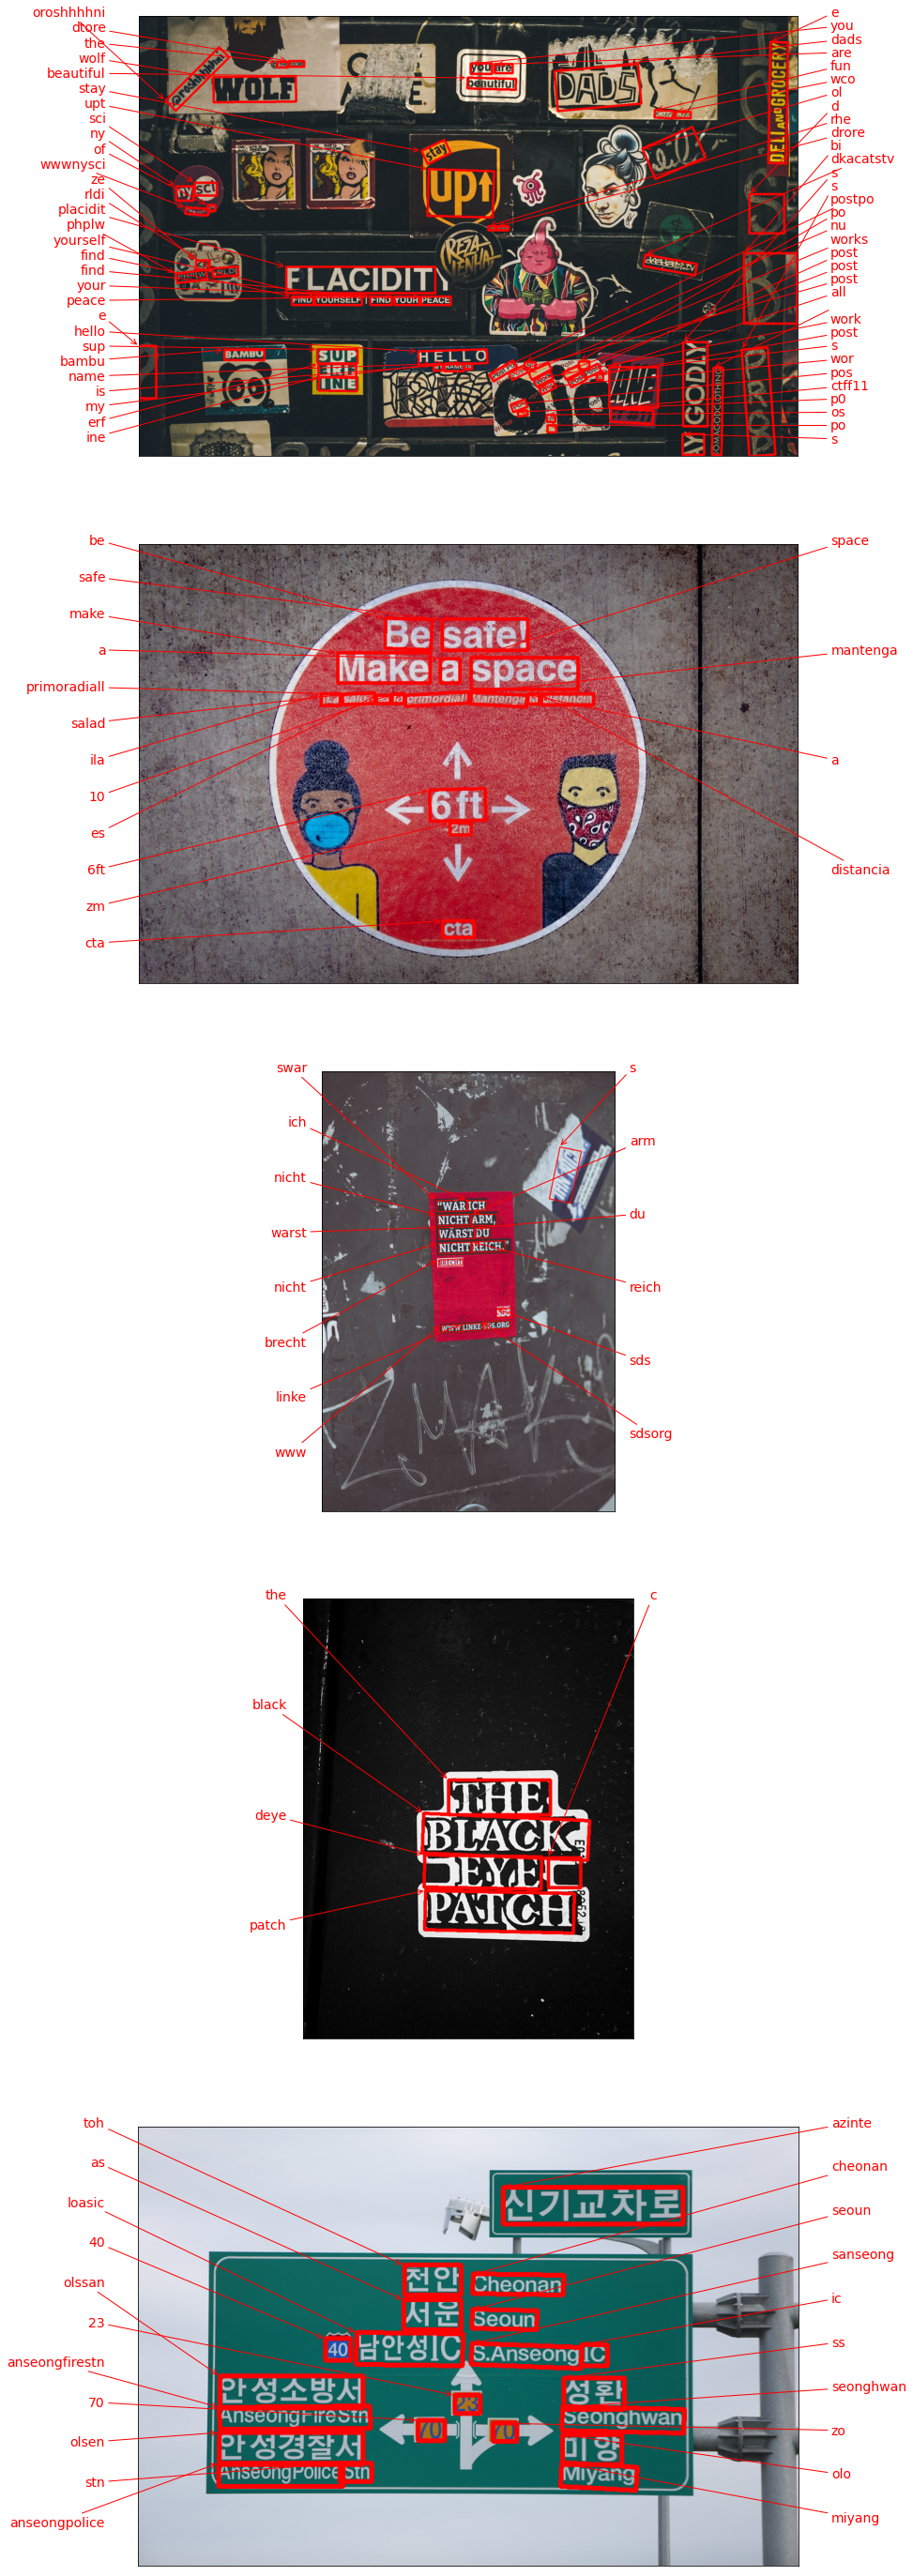

In [24]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(50,50))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

- 마지막 이미지에서 보다시피 keras-ocr은 영어는 잘 읽는데 한글지원이 안됨

# Tesseract

In [8]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output', language='eng'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang=language,    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


'''work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/paper.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)'''

"work_dir = os.getenv('HOME')+'/aiffel/ocr_python'\nimg_file_path = work_dir + '/paper.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. \n\ncropped_image_path_list = crop_word_regions(img_file_path, work_dir)"

In [9]:
def recognize_images(cropped_image_path_list,language='eng'):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang=language,    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [10]:
paths

['/home/aiffel-dj45/aiffel/ocr_python/0.jpg',
 '/home/aiffel-dj45/aiffel/ocr_python/1.jpg',
 '/home/aiffel-dj45/aiffel/ocr_python/2.jpg',
 '/home/aiffel-dj45/aiffel/ocr_python/3.jpg',
 '/home/aiffel-dj45/aiffel/ocr_python/4.jpg']

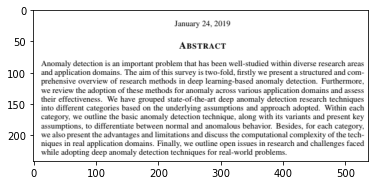

In [11]:
img0 = cv2.imread(path0, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img0, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'

cropped_image_path_list = crop_word_regions(paths[0], work_dir)
recognize_images(cropped_image_path_list)

/home/aiffel-dj45/aiffel/ocr_python/0000.png
/home/aiffel-dj45/aiffel/ocr_python/0001.png
/home/aiffel-dj45/aiffel/ocr_python/0002.png
/home/aiffel-dj45/aiffel/ocr_python/0003.png
/home/aiffel-dj45/aiffel/ocr_python/0004.png
/home/aiffel-dj45/aiffel/ocr_python/0005.png
/home/aiffel-dj45/aiffel/ocr_python/0006.png
/home/aiffel-dj45/aiffel/ocr_python/0007.png
/home/aiffel-dj45/aiffel/ocr_python/0008.png
/home/aiffel-dj45/aiffel/ocr_python/0009.png
/home/aiffel-dj45/aiffel/ocr_python/0010.png
/home/aiffel-dj45/aiffel/ocr_python/0011.png
/home/aiffel-dj45/aiffel/ocr_python/0012.png
/home/aiffel-dj45/aiffel/ocr_python/0013.png
/home/aiffel-dj45/aiffel/ocr_python/0014.png
/home/aiffel-dj45/aiffel/ocr_python/0015.png
/home/aiffel-dj45/aiffel/ocr_python/0016.png
/home/aiffel-dj45/aiffel/ocr_python/0017.png
/home/aiffel-dj45/aiffel/ocr_python/0018.png
/home/aiffel-dj45/aiffel/ocr_python/0019.png
/home/aiffel-dj45/aiffel/ocr_python/0020.png
/home/aiffel-dj45/aiffel/ocr_python/0021.png
/home/aiff

hey

r real-world

problems

Done


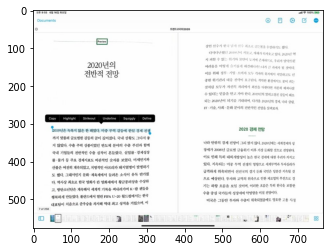

In [13]:
img1 = cv2.imread(path1, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'

cropped_image_path_list = crop_word_regions(paths[1], work_dir,'kor')
recognize_images(cropped_image_path_list,'kor')

/home/aiffel-dj45/aiffel/ocr_python/0000.png
/home/aiffel-dj45/aiffel/ocr_python/0001.png
/home/aiffel-dj45/aiffel/ocr_python/0002.png
/home/aiffel-dj45/aiffel/ocr_python/0003.png
/home/aiffel-dj45/aiffel/ocr_python/0004.png
/home/aiffel-dj45/aiffel/ocr_python/0005.png
/home/aiffel-dj45/aiffel/ocr_python/0006.png
/home/aiffel-dj45/aiffel/ocr_python/0007.png
/home/aiffel-dj45/aiffel/ocr_python/0008.png
/home/aiffel-dj45/aiffel/ocr_python/0009.png
/home/aiffel-dj45/aiffel/ocr_python/0010.png
/home/aiffel-dj45/aiffel/ocr_python/0011.png
/home/aiffel-dj45/aiffel/ocr_python/0012.png
/home/aiffel-dj45/aiffel/ocr_python/0013.png
/home/aiffel-dj45/aiffel/ocr_python/0014.png
/home/aiffel-dj45/aiffel/ocr_python/0015.png
/home/aiffel-dj45/aiffel/ocr_python/0016.png
/home/aiffel-dj45/aiffel/ocr_python/0017.png
/home/aiffel-dj45/aiffel/ocr_python/0018.png
/home/aiffel-dj45/aiffel/ocr_python/0019.png
/home/aiffel-dj45/aiffel/ocr_python/0020.png
/home/aiffel-dj45/aiffel/ocr_python/0021.png
/home/aiff

/home/aiffel-dj45/aiffel/ocr_python/0221.png
/home/aiffel-dj45/aiffel/ocr_python/0222.png
/home/aiffel-dj45/aiffel/ocr_python/0223.png
/home/aiffel-dj45/aiffel/ocr_python/0224.png
/home/aiffel-dj45/aiffel/ocr_python/0225.png
/home/aiffel-dj45/aiffel/ocr_python/0226.png
/home/aiffel-dj45/aiffel/ocr_python/0227.png
/home/aiffel-dj45/aiffel/ocr_python/0228.png
/home/aiffel-dj45/aiffel/ocr_python/0229.png
/home/aiffel-dj45/aiffel/ocr_python/0230.png
/home/aiffel-dj45/aiffel/ocr_python/0231.png
/home/aiffel-dj45/aiffel/ocr_python/0232.png
/home/aiffel-dj45/aiffel/ocr_python/0233.png
/home/aiffel-dj45/aiffel/ocr_python/0234.png
/home/aiffel-dj45/aiffel/ocr_python/0235.png
/home/aiffel-dj45/aiffel/ocr_python/0236.png
/home/aiffel-dj45/aiffel/ocr_python/0237.png
/home/aiffel-dj45/aiffel/ocr_python/0238.png
/home/aiffel-dj45/aiffel/ocr_python/0239.png
/home/aiffel-dj45/aiffel/ocr_python/0240.png
/home/aiffel-dj45/aiffel/ocr_python/0241.png
/home/aiffel-dj45/aiffel/ocr_python/0242.png
/home/aiff

/home/aiffel-dj45/aiffel/ocr_python/0411.png
/home/aiffel-dj45/aiffel/ocr_python/0412.png
/home/aiffel-dj45/aiffel/ocr_python/0413.png
/home/aiffel-dj45/aiffel/ocr_python/0414.png
/home/aiffel-dj45/aiffel/ocr_python/0415.png
/home/aiffel-dj45/aiffel/ocr_python/0416.png
/home/aiffel-dj45/aiffel/ocr_python/0417.png
/home/aiffel-dj45/aiffel/ocr_python/0418.png
/home/aiffel-dj45/aiffel/ocr_python/0419.png
/home/aiffel-dj45/aiffel/ocr_python/0420.png
/home/aiffel-dj45/aiffel/ocr_python/0421.png
/home/aiffel-dj45/aiffel/ocr_python/0422.png
/home/aiffel-dj45/aiffel/ocr_python/0423.png
/home/aiffel-dj45/aiffel/ocr_python/0424.png
/home/aiffel-dj45/aiffel/ocr_python/0425.png
/home/aiffel-dj45/aiffel/ocr_python/0426.png
/home/aiffel-dj45/aiffel/ocr_python/0427.png
/home/aiffel-dj45/aiffel/ocr_python/0428.png
/home/aiffel-dj45/aiffel/ocr_python/0429.png
/home/aiffel-dj45/aiffel/ocr_python/0430.png
/home/aiffel-dj45/aiffel/ocr_python/0431.png
/home/aiffel-dj45/aiffel/ocr_python/0432.png
/home/aiff

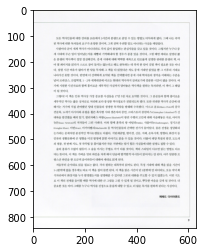

In [15]:
img2 = cv2.imread(path2, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'

cropped_image_path_list = crop_word_regions(paths[2], work_dir,'kor')
recognize_images(cropped_image_path_list,'kor')

/home/aiffel-dj45/aiffel/ocr_python/0000.png
/home/aiffel-dj45/aiffel/ocr_python/0001.png
/home/aiffel-dj45/aiffel/ocr_python/0002.png
/home/aiffel-dj45/aiffel/ocr_python/0003.png
/home/aiffel-dj45/aiffel/ocr_python/0004.png
/home/aiffel-dj45/aiffel/ocr_python/0005.png
/home/aiffel-dj45/aiffel/ocr_python/0006.png
/home/aiffel-dj45/aiffel/ocr_python/0007.png
/home/aiffel-dj45/aiffel/ocr_python/0008.png
/home/aiffel-dj45/aiffel/ocr_python/0009.png
/home/aiffel-dj45/aiffel/ocr_python/0010.png
/home/aiffel-dj45/aiffel/ocr_python/0011.png
/home/aiffel-dj45/aiffel/ocr_python/0012.png
/home/aiffel-dj45/aiffel/ocr_python/0013.png
/home/aiffel-dj45/aiffel/ocr_python/0014.png
/home/aiffel-dj45/aiffel/ocr_python/0015.png
/home/aiffel-dj45/aiffel/ocr_python/0016.png
/home/aiffel-dj45/aiffel/ocr_python/0017.png
/home/aiffel-dj45/aiffel/ocr_python/0018.png
/home/aiffel-dj45/aiffel/ocr_python/0019.png
/home/aiffel-dj45/aiffel/ocr_python/0020.png
/home/aiffel-dj45/aiffel/ocr_python/0021.png
/home/aiff

/home/aiffel-dj45/aiffel/ocr_python/0191.png
/home/aiffel-dj45/aiffel/ocr_python/0192.png
/home/aiffel-dj45/aiffel/ocr_python/0193.png
/home/aiffel-dj45/aiffel/ocr_python/0194.png
/home/aiffel-dj45/aiffel/ocr_python/0195.png
/home/aiffel-dj45/aiffel/ocr_python/0196.png
/home/aiffel-dj45/aiffel/ocr_python/0197.png
/home/aiffel-dj45/aiffel/ocr_python/0198.png
/home/aiffel-dj45/aiffel/ocr_python/0199.png
/home/aiffel-dj45/aiffel/ocr_python/0200.png
/home/aiffel-dj45/aiffel/ocr_python/0201.png
/home/aiffel-dj45/aiffel/ocr_python/0202.png
/home/aiffel-dj45/aiffel/ocr_python/0203.png
/home/aiffel-dj45/aiffel/ocr_python/0204.png
/home/aiffel-dj45/aiffel/ocr_python/0205.png
/home/aiffel-dj45/aiffel/ocr_python/0206.png
/home/aiffel-dj45/aiffel/ocr_python/0207.png
/home/aiffel-dj45/aiffel/ocr_python/0208.png
/home/aiffel-dj45/aiffel/ocr_python/0209.png
/home/aiffel-dj45/aiffel/ocr_python/0210.png
/home/aiffel-dj45/aiffel/ocr_python/0211.png
/home/aiffel-dj45/aiffel/ocr_python/0212.png
/home/aiff

/home/aiffel-dj45/aiffel/ocr_python/0375.png
/home/aiffel-dj45/aiffel/ocr_python/0376.png
/home/aiffel-dj45/aiffel/ocr_python/0377.png
/home/aiffel-dj45/aiffel/ocr_python/0378.png
/home/aiffel-dj45/aiffel/ocr_python/0379.png
/home/aiffel-dj45/aiffel/ocr_python/0380.png
/home/aiffel-dj45/aiffel/ocr_python/0381.png
/home/aiffel-dj45/aiffel/ocr_python/0382.png
/home/aiffel-dj45/aiffel/ocr_python/0383.png
/home/aiffel-dj45/aiffel/ocr_python/0384.png
/home/aiffel-dj45/aiffel/ocr_python/0385.png
/home/aiffel-dj45/aiffel/ocr_python/0386.png
/home/aiffel-dj45/aiffel/ocr_python/0387.png
/home/aiffel-dj45/aiffel/ocr_python/0388.png
/home/aiffel-dj45/aiffel/ocr_python/0389.png
/home/aiffel-dj45/aiffel/ocr_python/0390.png
/home/aiffel-dj45/aiffel/ocr_python/0391.png
/home/aiffel-dj45/aiffel/ocr_python/0392.png
/home/aiffel-dj45/aiffel/ocr_python/0393.png
/home/aiffel-dj45/aiffel/ocr_python/0394.png
/home/aiffel-dj45/aiffel/ocr_python/0395.png
/home/aiffel-dj45/aiffel/ocr_python/0396.png
/home/aiff

/home/aiffel-dj45/aiffel/ocr_python/0558.png
/home/aiffel-dj45/aiffel/ocr_python/0559.png
/home/aiffel-dj45/aiffel/ocr_python/0560.png
/home/aiffel-dj45/aiffel/ocr_python/0561.png
/home/aiffel-dj45/aiffel/ocr_python/0562.png
/home/aiffel-dj45/aiffel/ocr_python/0563.png
/home/aiffel-dj45/aiffel/ocr_python/0564.png
/home/aiffel-dj45/aiffel/ocr_python/0565.png
/home/aiffel-dj45/aiffel/ocr_python/0566.png
/home/aiffel-dj45/aiffel/ocr_python/0567.png
/home/aiffel-dj45/aiffel/ocr_python/0568.png
/home/aiffel-dj45/aiffel/ocr_python/0569.png
/home/aiffel-dj45/aiffel/ocr_python/0570.png
/home/aiffel-dj45/aiffel/ocr_python/0571.png
/home/aiffel-dj45/aiffel/ocr_python/0572.png
/home/aiffel-dj45/aiffel/ocr_python/0573.png
/home/aiffel-dj45/aiffel/ocr_python/0574.png
/home/aiffel-dj45/aiffel/ocr_python/0575.png
/home/aiffel-dj45/aiffel/ocr_python/0576.png
/home/aiffel-dj45/aiffel/ocr_python/0577.png
/home/aiffel-dj45/aiffel/ocr_python/0578.png
/home/aiffel-dj45/aiffel/ocr_python/0579.png
/home/aiff

/home/aiffel-dj45/aiffel/ocr_python/0757.png
/home/aiffel-dj45/aiffel/ocr_python/0758.png
/home/aiffel-dj45/aiffel/ocr_python/0759.png
/home/aiffel-dj45/aiffel/ocr_python/0760.png
/home/aiffel-dj45/aiffel/ocr_python/0761.png
/home/aiffel-dj45/aiffel/ocr_python/0762.png
/home/aiffel-dj45/aiffel/ocr_python/0763.png
/home/aiffel-dj45/aiffel/ocr_python/0764.png
/home/aiffel-dj45/aiffel/ocr_python/0765.png
/home/aiffel-dj45/aiffel/ocr_python/0766.png
/home/aiffel-dj45/aiffel/ocr_python/0767.png
/home/aiffel-dj45/aiffel/ocr_python/0768.png
/home/aiffel-dj45/aiffel/ocr_python/0769.png
/home/aiffel-dj45/aiffel/ocr_python/0770.png
/home/aiffel-dj45/aiffel/ocr_python/0771.png
/home/aiffel-dj45/aiffel/ocr_python/0772.png
/home/aiffel-dj45/aiffel/ocr_python/0773.png
/home/aiffel-dj45/aiffel/ocr_python/0774.png
/home/aiffel-dj45/aiffel/ocr_python/0775.png
/home/aiffel-dj45/aiffel/ocr_python/0776.png
/home/aiffel-dj45/aiffel/ocr_python/0777.png
/home/aiffel-dj45/aiffel/ocr_python/0778.png
/home/aiff

자계

해서

나숭에

범

그

범

럭

가

^

|두이

2

1

^

금-

안된다

하주

남콩한

그

랑

~

산


인

아

한

자

…

척


[】

1ㅎ

[>


| 대

해

ㆍ.

[제대로

이

제

된다

처


을 부터

나:

세

대도

이 은

법

떠

글

[+

각ㅅ

| 원하는

내


포누터

이

어1

노

뛰나

점

^

대

어

내해

깨

곡-

이오

^

|간^

|

|~

2

박예

없음

섞

~

예도

바로

「 >

| 책을


시^

| 들면

두다

「

| 책

"~

21 으.

^

|간ㅎ

|

단


|문

밖에

내

『 되더라도

오금

저녁

히

래

자

미

어

나

않

}장

지

가

ㅜㅠ

「받

명

콩부

~

지

도

성

떠

태


~

있다면

“~ 1

~

의

미

와



질

일 ㅜㅜ

기"

| 않

이런

내

다

토

]

잭

이

전

체

그

,느

비

양

때즈

역

ㆍ

|헤

내한

~

6

더

그

그람

때

잎게

뛰

성이고

뿌드하

1

는


같게

될 것이다

너

요한

젖은

하마

드르

내

습

누구나

3

^

[는

신

점

2 로


집게

대항

ㅜ~

있고,

ㄴ

| 많은


즉석

아소

린

하

제

도나

^

『심

이다

-- _ ㅋㄴ ㅠㄷㄷ

은

1탑

울론 전

섰은가

제

례

토

다이아몬드

“_  /ㅅ*,0, ㅣ 0 0 0,【ㅁ22027 ㆍ*ㆍ,Ｌ,Ｌ,, >, ~ ㅣ ㅋ 받ㅣ

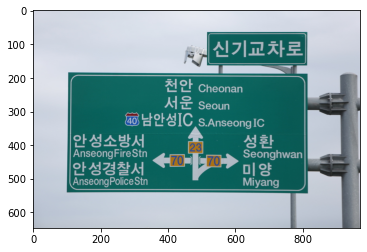

In [17]:
img3 = cv2.imread(path3, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'

cropped_image_path_list = crop_word_regions(paths[3], work_dir,'kor')
recognize_images(cropped_image_path_list,'kor')

/home/aiffel-dj45/aiffel/ocr_python/0000.png
/home/aiffel-dj45/aiffel/ocr_python/0001.png
/home/aiffel-dj45/aiffel/ocr_python/0002.png
/home/aiffel-dj45/aiffel/ocr_python/0003.png
/home/aiffel-dj45/aiffel/ocr_python/0004.png
/home/aiffel-dj45/aiffel/ocr_python/0005.png
/home/aiffel-dj45/aiffel/ocr_python/0006.png
/home/aiffel-dj45/aiffel/ocr_python/0007.png
/home/aiffel-dj45/aiffel/ocr_python/0008.png
/home/aiffel-dj45/aiffel/ocr_python/0009.png
/home/aiffel-dj45/aiffel/ocr_python/0010.png
/home/aiffel-dj45/aiffel/ocr_python/0011.png
/home/aiffel-dj45/aiffel/ocr_python/0012.png
/home/aiffel-dj45/aiffel/ocr_python/0013.png
/home/aiffel-dj45/aiffel/ocr_python/0014.png
/home/aiffel-dj45/aiffel/ocr_python/0015.png
/home/aiffel-dj45/aiffel/ocr_python/0016.png
/home/aiffel-dj45/aiffel/ocr_python/0017.png
/home/aiffel-dj45/aiffel/ocr_python/0018.png
/home/aiffel-dj45/aiffel/ocr_python/0019.png
/home/aiffel-dj45/aiffel/ocr_python/0020.png
/home/aiffel-dj45/aiffel/ocr_python/0021.png
/home/aiff

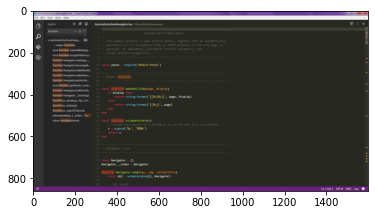

In [19]:
img4 = cv2.imread(path4, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
paths

['/home/aiffel-dj45/aiffel/ocr_python/0.jpg',
 '/home/aiffel-dj45/aiffel/ocr_python/1.jpg',
 '/home/aiffel-dj45/aiffel/ocr_python/2.jpg',
 '/home/aiffel-dj45/aiffel/ocr_python/3.jpg',
 '/home/aiffel-dj45/aiffel/ocr_python/4.jpg']

In [21]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'

cropped_image_path_list = crop_word_regions(paths[4], work_dir)
recognize_images(cropped_image_path_list)

/home/aiffel-dj45/aiffel/ocr_python/0000.png
/home/aiffel-dj45/aiffel/ocr_python/0001.png
/home/aiffel-dj45/aiffel/ocr_python/0002.png
/home/aiffel-dj45/aiffel/ocr_python/0003.png
/home/aiffel-dj45/aiffel/ocr_python/0004.png
/home/aiffel-dj45/aiffel/ocr_python/0005.png
/home/aiffel-dj45/aiffel/ocr_python/0006.png
/home/aiffel-dj45/aiffel/ocr_python/0007.png
/home/aiffel-dj45/aiffel/ocr_python/0008.png
/home/aiffel-dj45/aiffel/ocr_python/0009.png
/home/aiffel-dj45/aiffel/ocr_python/0010.png
/home/aiffel-dj45/aiffel/ocr_python/0011.png
/home/aiffel-dj45/aiffel/ocr_python/0012.png
/home/aiffel-dj45/aiffel/ocr_python/0013.png
/home/aiffel-dj45/aiffel/ocr_python/0014.png
/home/aiffel-dj45/aiffel/ocr_python/0015.png
/home/aiffel-dj45/aiffel/ocr_python/0016.png
/home/aiffel-dj45/aiffel/ocr_python/0017.png
/home/aiffel-dj45/aiffel/ocr_python/0018.png
/home/aiffel-dj45/aiffel/ocr_python/0019.png
/home/aiffel-dj45/aiffel/ocr_python/0020.png
/home/aiffel-dj45/aiffel/ocr_python/0021.png
/home/aiff

- 테서렉트는 영어는 잘 읽어대는데 한글은 잘 못읽는다 나쁜것